In [7]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import ta

In [55]:
class TrackPortfolio:
    
    def __init__(self, ticker, indicators, start_date, end_date):
        self._ticker = ticker
        self._indicators = indicators
        self._start_date = start_date
        self._end_date = end_date

    def dl_data(self):
        df = yf.download(self._ticker, 
                              start=self._start_date, 
                              end=self._end_date, 
                              progress=False)
        df = ta.add_all_ta_features(
            df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
        all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
        df = df.reindex(all_weekdays)
        self._df = df.fillna(method='ffill')
        
    def plot_chart(self):
        fig, ax = plt.subplots(figsize=(16,9))
        for i in self._indicators:
            j = self._df.loc[:,i]
            ax.plot(j.index, j, label= i)
        ax.set_xlabel('Date')
        ax.set_ylabel(self._ticker)
        ax.legend()
        plt.show()
    
    @property
    def get_indicators(self):
        return self._df.columns
    
    @property
    def get_df(self):
        return self._df

In [180]:
indicators_bb = ['Close', 'volatility_bbh', 'volatility_bbm', 'volatility_bbl']
indicators_ma = ['Close', 'trend_sma_fast', 'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow']
buy_signal = ['volatility_bbli', 'volatility_kcli', 'buy_rsi']
sell_signal = ['volatility_bbhi', 'volatility_kchi', 'sell_rsi']
rsi = ['momentum_rsi']

In [181]:
start_date = '2015-01-01'
end_date = dt.datetime.today()

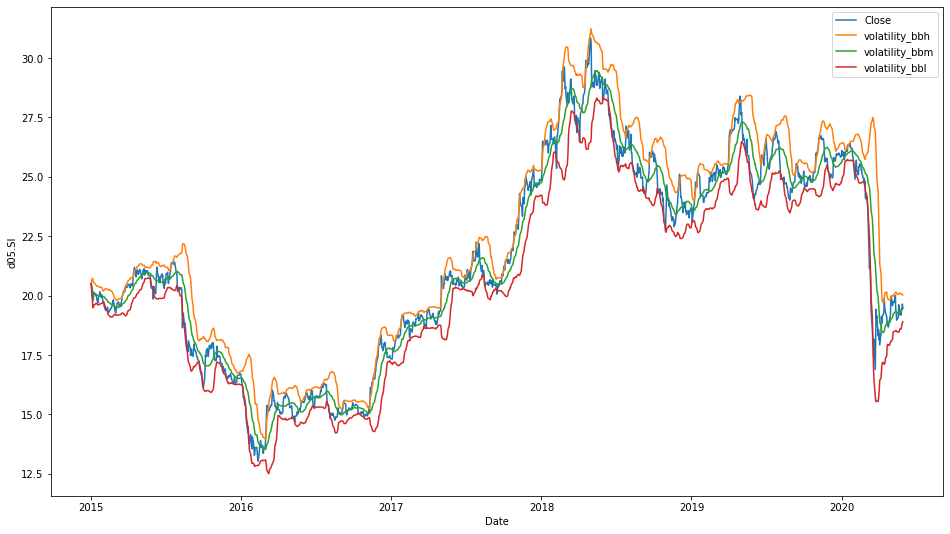

In [192]:
d05 = TrackPortfolio('d05.SI', indicators_bb, start_date, end_date)
d05.dl_data()
d05.plot_chart()

In [193]:
d05_df = d05.get_df

In [194]:
d05_df['buy_rsi'] = d05_df.loc[:, rsi] < 30
d05_df['sell_rsi'] = d05_df.loc[:, rsi] > 70

In [195]:
buy_days = d05_df.loc[d05_df.loc[:, buy_signal].sum(axis = 1) == len(buy_signal),:].index
buy_days

DatetimeIndex(['2015-02-05', '2015-02-06', '2015-06-02', '2015-08-12',
               '2015-08-13', '2015-09-23', '2015-09-24', '2015-09-25',
               '2015-09-28', '2015-09-29', '2015-09-30', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15', '2016-01-18', '2016-08-03',
               '2016-08-05', '2018-10-26', '2020-02-03', '2020-02-28',
               '2020-03-02', '2020-03-04', '2020-03-05', '2020-03-06',
               '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
               '2020-03-13', '2020-03-16', '2020-03-17'],
              dtype='datetime64[ns]', freq=None)

In [196]:
sell_days = d05_df.loc[d05_df.loc[:, sell_signal].sum(axis = 1) == len(sell_signal),:].index
sell_days

DatetimeIndex(['2015-04-15', '2015-04-16', '2015-04-17', '2016-06-08',
               '2016-11-11', '2016-11-14', '2016-11-15', '2017-01-13',
               '2017-01-26', '2017-01-27', '2017-01-30', '2017-05-03',
               '2017-07-27', '2017-10-25', '2017-10-26', '2017-10-27',
               '2017-10-31', '2017-11-01', '2017-11-08', '2017-11-09',
               '2017-11-22', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-02-15', '2018-02-16', '2018-02-19',
               '2018-02-21', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-10-31', '2019-11-04', '2019-11-05', '2019-11-06',
               '2019-11-07'],
              dtype='datetime64[ns]', freq=None)